In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "40"
os.environ["NUMBA_NUM_THREADS"] = "40"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import seaborn as sns

In [3]:
import sys
sys.path.append("../code/")

In [4]:
from objectives import get_qaoa_labs_objective
from objectives import get_precomputed_optimal_bitstrings

In [5]:
df_MF = pd.read_json("../qokit/assets/best_known_QAOA_parameters_wrt_MF.json", orient="index")
df_o = pd.read_json("../qokit/assets/best_known_QAOA_parameters_wrt_overlap.json", orient="index")

# Scaling at intermediate point

Let's look at how the amplitude grows throughout the evolution

In the beginning, the amplitudes grow much faster for large N than they do for small N. So the scaling improves

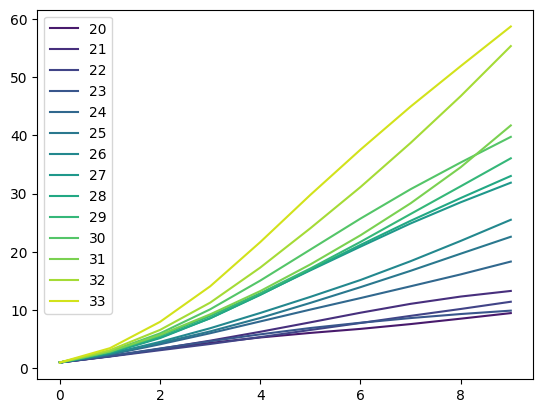

In [6]:
Ns = range(20, 34)
cmap = sns.color_palette('viridis', len(Ns))
p_max = 27
for idx, N in enumerate(Ns):
    outpath = f"../scripts/data/0221_intermediate_for_transferred_mean_overlap_0217_{N}_{p_max}.pickle"

    res = pickle.load(open(outpath, "rb"))

    amplitudes = np.sqrt(res["overlaps"])
    
    # print(f"Slope for N={N}: {(2**(N-22))*(amplitudes[18]-amplitudes[15])/(3*len(get_precomputed_optimal_bitstrings(N))):.5f}")
    plt.plot(amplitudes[:10] / amplitudes[0], label=N, c=cmap[idx])
    
plt.legend()
# print(f"Slopes: {(amplitudes[13]-amplitudes[5])/8:.5f}, {(amplitudes[27]-amplitudes[20])/7:.5f}")

# plt.plot([x*(amplitudes[13]-amplitudes[5])/8-0.004 for x in range(len(amplitudes))], linestyle="dashed", c='k', lw=0.75)
# plt.plot([x*(amplitudes[27]-amplitudes[20])/7+0.009 for x in range(len(amplitudes))], linestyle="dotted", c='k', lw=0.75)

but at the end of the evolution, the amplitudes grow more or less the same for everyone

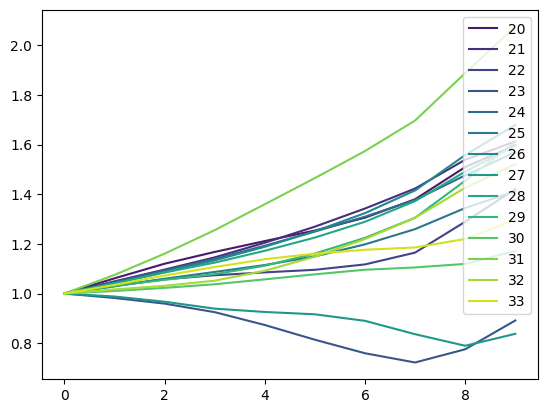

In [7]:
for idx, N in enumerate(Ns):
    outpath = f"../scripts/data/0221_intermediate_for_transferred_mean_overlap_0217_{N}_{p_max}.pickle"

    res = pickle.load(open(outpath, "rb"))

    amplitudes = np.sqrt(res["overlaps"])
    
    # print(f"Slope for N={N}: {(2**(N-22))*(amplitudes[18]-amplitudes[15])/(3*len(get_precomputed_optimal_bitstrings(N))):.5f}")
    plt.plot(amplitudes[-10:] / amplitudes[-10], label=N, c=cmap[idx])
    
plt.legend()
# print(f"Slopes: {(amplitudes[13]-amplitudes[5])/8:.5f}, {(amplitudes[27]-amplitudes[20])/7:.5f}")

# plt.plot([x*(amplitudes[13]-amplitudes[5])/8-0.004 for x in range(len(amplitudes))], linestyle="dashed", c='k', lw=0.75)
# plt.plot([x*(amplitudes[27]-amplitudes[20])/7+0.009 for x in range(len(amplitudes))], linestyle="dotted", c='k', lw=0.75)

0.00027519713486945374


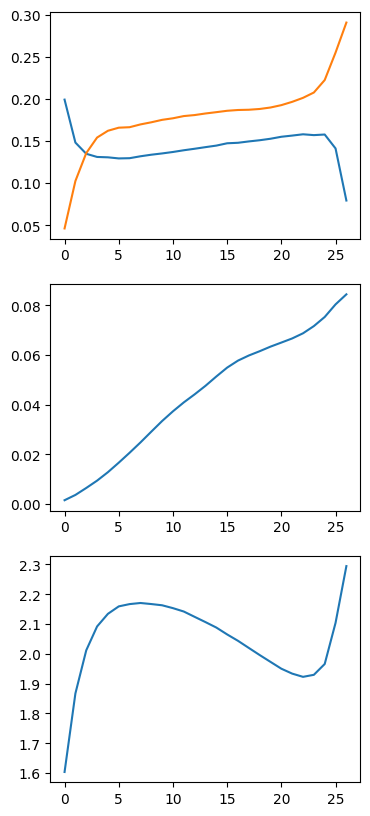

In [41]:
N = 25


_, ax = plt.subplots(3,1, figsize=(4,10))

# for p_max in [11, 16, 27]:
for p_max in [27]:

    outpath = f"../scripts/data/0221_intermediate_for_transferred_mean_overlap_0217_{N}_{p_max}.pickle"

    res = pickle.load(open(outpath, "rb"))
    print(res['overlaps'][5])

    ax[0].plot(-np.array(res['beta']))
    ax[0].plot(np.array(res['gamma'])*5)
    ax[1].plot(np.sqrt(res['overlaps']))
    ax[2].plot(res['merit_factors'])

# Older notes

# First, merit factor. For merit factor, overlap does not grow with p monotonically

Who knows what's up with that

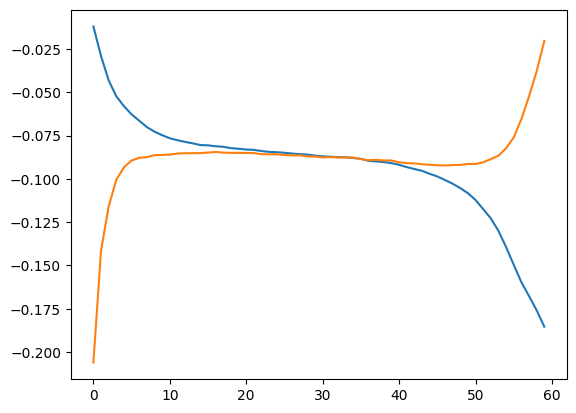

In [97]:
# row = df_o[(df_o["N"] == 24) & (df_o["p"] == 34)].squeeze()
row = df_MF[(df_MF["N"] == 24) & (df_MF["p"] == 60)].squeeze()

plt.plot(-np.array(row['gamma'])*3)
plt.plot(np.array(row['beta']))

In [98]:
N = row['N']
p_max = row['p']
df_suffix = ""

outpath = f"../scripts/data/0220_intermediate_overlaps_{N}_{p_max}{df_suffix}.pickle"

res = pickle.load(open(outpath, "rb"))

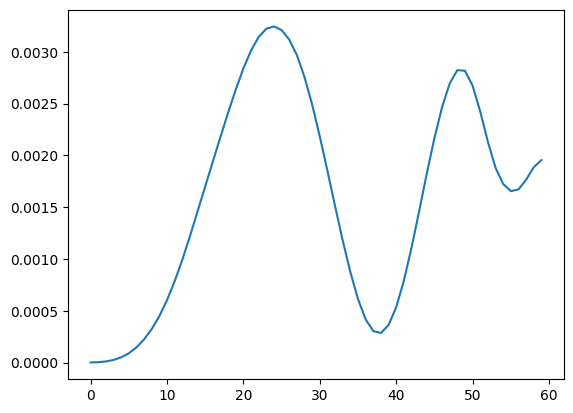

In [99]:
plt.plot(res["overlaps"])

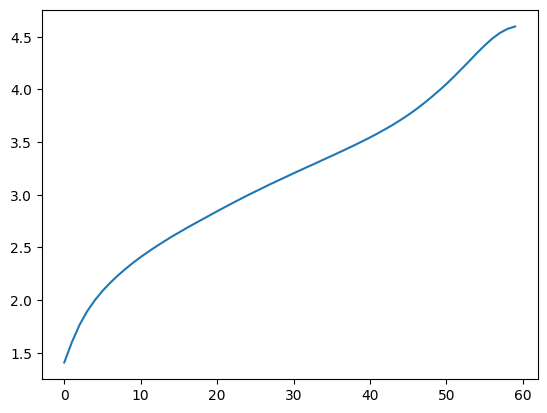

In [100]:
plt.plot(res["merit_factors"])

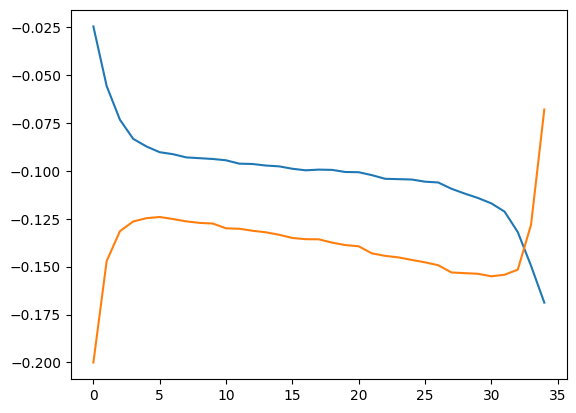

In [120]:
row = df_o[(df_o["N"] == 26) & (df_o["p"] == 35)].squeeze()

plt.plot(-np.array(row['gamma'])*3)
plt.plot(np.array(row['beta']))

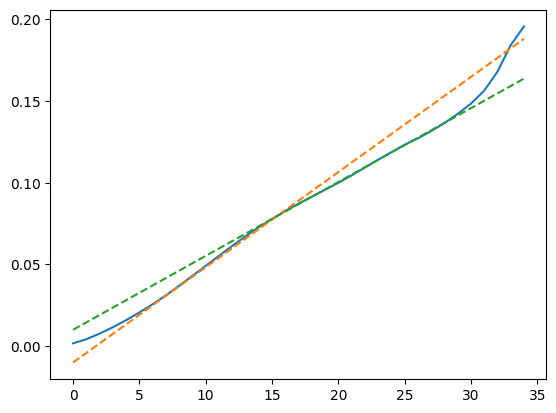

In [132]:
N = row['N']
p_max = row['p']
df_suffix = "_overlap"

outpath = f"../scripts/data/0220_intermediate_overlaps_{N}_{p_max}{df_suffix}.pickle"

res = pickle.load(open(outpath, "rb"))

amplitudes = np.sqrt(res["overlaps"])
plt.plot(amplitudes)
# plt.plot([x*(amplitudes[-5]-amplitudes[5])/(len(amplitudes)-10) for x in range(len(amplitudes))])
plt.plot([x*(amplitudes[13]-amplitudes[5])/8-0.01 for x in range(len(amplitudes))], linestyle="dashed")
plt.plot([x*(amplitudes[27]-amplitudes[20])/7+0.01 for x in range(len(amplitudes))], linestyle="dashed")

## Higher p does not improve scaling because in the middle the amplitude grows linearly!

Jump at the end is what gives slightly-better-than-Grover scaling

# Same for different N

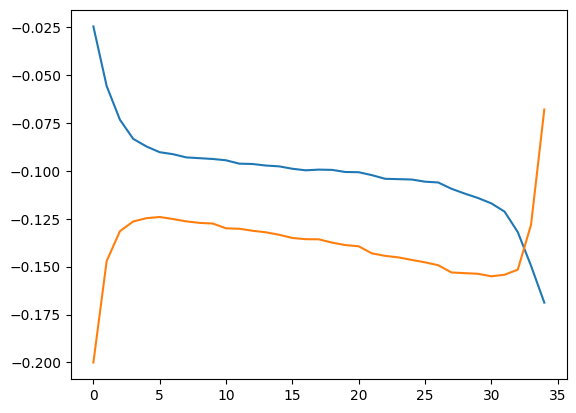

In [120]:
row = df_o[(df_o["N"] == 26) & (df_o["p"] == 35)].squeeze()

plt.plot(-np.array(row['gamma'])*3)
plt.plot(np.array(row['beta']))

Slopes: 0.00582, 0.00452


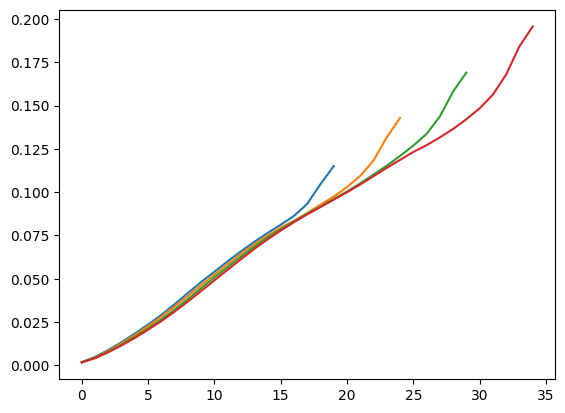

In [35]:
N = 26
for p_max in np.arange(20, 36, 5):
    df_suffix = "_overlap"

    outpath = f"../scripts/data/0220_intermediate_overlaps_{N}_{p_max}{df_suffix}.pickle"

    res = pickle.load(open(outpath, "rb"))

    amplitudes = np.sqrt(res["overlaps"])
    plt.plot(amplitudes)

print(f"Slopes: {(amplitudes[13]-amplitudes[5])/8:.5f}, {(amplitudes[27]-amplitudes[20])/7:.5f}")

# plt.plot([x*(amplitudes[13]-amplitudes[5])/8-0.008 for x in range(len(amplitudes))], linestyle="dashed", c='k', lw=0.75)
# plt.plot([x*(amplitudes[27]-amplitudes[20])/7+0.01 for x in range(len(amplitudes))], linestyle="dotted", c='k', lw=0.75)

Slopes: 0.00376, 0.00296


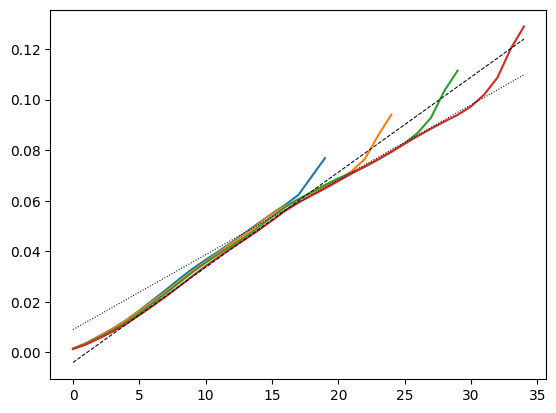

In [152]:
N = 25
for p_max in np.arange(20, 36, 5):
    df_suffix = "_overlap"

    outpath = f"../scripts/data/0220_intermediate_overlaps_{N}_{p_max}{df_suffix}.pickle"

    res = pickle.load(open(outpath, "rb"))

    amplitudes = np.sqrt(res["overlaps"])
    plt.plot(amplitudes)
    
print(f"Slopes: {(amplitudes[13]-amplitudes[5])/8:.5f}, {(amplitudes[27]-amplitudes[20])/7:.5f}")

plt.plot([x*(amplitudes[13]-amplitudes[5])/8-0.004 for x in range(len(amplitudes))], linestyle="dashed", c='k', lw=0.75)
plt.plot([x*(amplitudes[27]-amplitudes[20])/7+0.009 for x in range(len(amplitudes))], linestyle="dotted", c='k', lw=0.75)

# Does the overlap growth rate change with N?

In [7]:
for N in [22,23,24,25,26,27]:
    print(N, len(get_precomputed_optimal_bitstrings(N)))

22 24
23 24
24 8
25 8
26 24
27 4


Slope for N=22: 0.00034
Slope for N=23: 0.00040
Slope for N=24: 0.00192
Slope for N=25: 0.00332
Slope for N=26: 0.00302
Slope for N=27: 0.01490


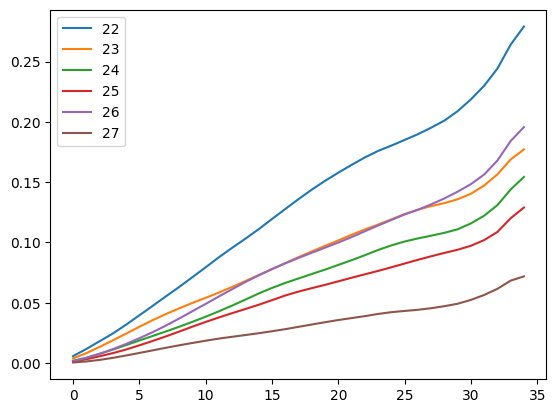

In [15]:
p_max = 35
for N in [22,23,24,25,26,27]:
    df_suffix = "_overlap"

    outpath = f"../scripts/data/0220_intermediate_overlaps_{N}_{p_max}{df_suffix}.pickle"

    res = pickle.load(open(outpath, "rb"))

    amplitudes = np.sqrt(res["overlaps"])
    
    # print(f"Slope for N={N}: {(2**(N-22))*(amplitudes[18]-amplitudes[15])/(3*len(get_precomputed_optimal_bitstrings(N))):.5f}")
    plt.plot(amplitudes, label=N)
    
plt.legend()
# print(f"Slopes: {(amplitudes[13]-amplitudes[5])/8:.5f}, {(amplitudes[27]-amplitudes[20])/7:.5f}")

# plt.plot([x*(amplitudes[13]-amplitudes[5])/8-0.004 for x in range(len(amplitudes))], linestyle="dashed", c='k', lw=0.75)
# plt.plot([x*(amplitudes[27]-amplitudes[20])/7+0.009 for x in range(len(amplitudes))], linestyle="dotted", c='k', lw=0.75)

In [60]:
N = row['N']
beta = row['beta']
gamma = row['gamma']

overlaps = []

p_max = len(beta)
assert len(gamma) == p_max
for p in range(1, p_max+1):
    o = 1-get_qaoa_labs_objective(N, p, parameterization="gamma beta", objective="overlap")(gamma[:p], beta[:p])
    print(f"{p}\t{o}")
    overlaps.append(o)

/opt/omniai/work/instance1/jupyter/jpmc-argonne-quantum-optimization/jupyter/../code/objectives.py:187: UserWarning: CUDA is NOT available, using cfurx simulator
  warnings.warn(f"CUDA is NOT available, using {simulator} simulator")


1	1.2229215351489131e-06
2	3.9659696425831115e-06
3	1.1064518927184075e-05
4	2.554060688841897e-05
5	5.054538934534669e-05
6	8.959407206610148e-05
7	0.00014613063922552794
8	0.00022324830355902048
9	0.00032246825844961524
10	0.00044779751543411184
11	0.0006014992637409788
12	0.0007826751922042074
13	0.000990032191004353
14	0.0012178855541450373
15	0.0014579420555421718
16	0.0016984676276803334
17	0.0019390620358250565
18	0.0021773701326266437
19	0.002410905067156799
20	0.0026341262266639243
21	0.0028388191971279175
22	0.0030116268748766606
23	0.0031432265392259406
24	0.0032222341626211293
25	0.0032443908134583976
26	0.0032097912246462634
27	0.003117899425363335
28	0.0029684283816368007
29	0.0027564856393865744
30	0.0024910215280347092
31	0.0021835453145576667
32	0.001851584700026665
33	0.001511066239518466
34	0.0011778654444366543
35	0.0008736844704044788
36	0.0006135716120181378
37	0.0004171831214461186
38	0.0003044438030272989
39	0.0002857002303685574
40	0.0003630523028430588
41	0.00

In [65]:
overlaps = list(overlaps)

In [66]:
overlaps.append(1-get_qaoa_labs_objective(N, p_max, parameterization="gamma beta", objective="overlap")(gamma, beta))

In [67]:
overlaps = np.array(overlaps)

In [68]:
overlaps

array([1.22292154e-06, 3.96596964e-06, 1.10645189e-05, 2.55406069e-05,
       5.05453893e-05, 8.95940721e-05, 1.46130639e-04, 2.23248304e-04,
       3.22468258e-04, 4.47797515e-04, 6.01499264e-04, 7.82675192e-04,
       9.90032191e-04, 1.21788555e-03, 1.45794206e-03, 1.69846763e-03,
       1.93906204e-03, 2.17737013e-03, 2.41090507e-03, 2.63412623e-03,
       2.83881920e-03, 3.01162687e-03, 3.14322654e-03, 3.22223416e-03,
       3.24439081e-03, 3.20979122e-03, 3.11789943e-03, 2.96842838e-03,
       2.75648564e-03, 2.49102153e-03, 2.18354531e-03, 1.85158470e-03,
       1.51106624e-03, 1.17786544e-03, 8.73684470e-04, 6.13571612e-04,
       4.17183121e-04, 3.04443803e-04, 2.85700230e-04, 3.63052303e-04,
       5.34780374e-04, 7.90497714e-04, 1.10777167e-03, 1.46098421e-03,
       1.82500405e-03, 2.16793763e-03, 2.46521380e-03, 2.69512054e-03,
       2.82325950e-03, 2.81649305e-03, 2.67183053e-03, 2.42103355e-03,
       2.13012227e-03, 1.88027389e-03, 1.72385766e-03, 1.65481584e-03,
      

# Rate of overlap improvement

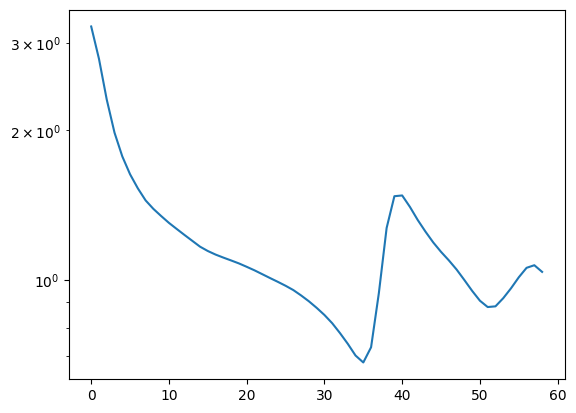

In [71]:
plt.plot(overlaps[1:] / overlaps[:-1])
plt.yscale('log')

In [18]:
overlaps[1:] / overlaps[:-1]

array([5.55050516, 3.13337866, 2.14992391, 1.79003403, 1.58999675,
       1.44884122, 1.3741972 , 1.3203201 , 1.28918557, 1.26140809,
       1.24755064, 1.23583615, 1.2248857 , 1.20501872, 1.17337557,
       1.14049166, 1.12253867, 1.11220715, 1.11168714, 1.10445468,
       1.09400364, 1.08341437, 1.07453018, 1.05809666, 1.06103057,
       1.05693398, 1.08097993, 1.11260105, 1.15357707, 1.20568657])

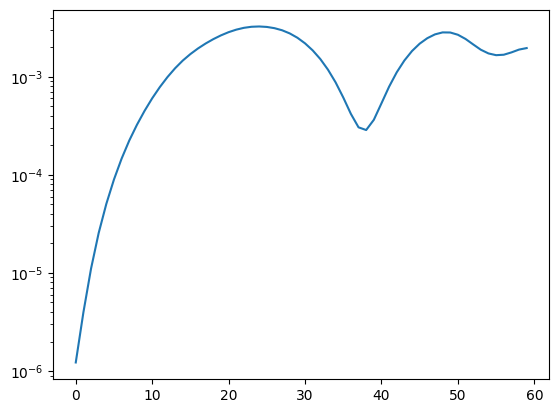

In [70]:
plt.plot(overlaps)
plt.yscale('log')

# For parameters optimized for overlap, amplitudes grow linearly-ish

In [28]:
amplitudes = np.sqrt(overlaps)

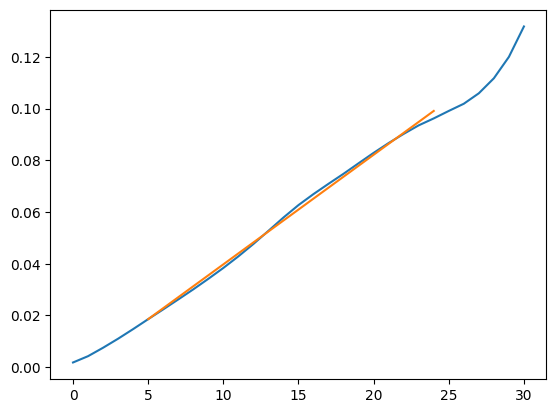

In [44]:
plt.plot(amplitudes)
plt.plot(np.arange(5,25),np.linspace(amplitudes[5], amplitudes[25], 25-5))
# plt.yscale('log')

In [48]:
amplitudes[1:]-amplitudes[:-1]

array([0.00243769, 0.00326187, 0.00349572, 0.00371479, 0.00383802,
       0.00377739, 0.00384544, 0.00390049, 0.00407206, 0.00420362,
       0.00448397, 0.0047832 , 0.00508237, 0.00515001, 0.00481408,
       0.00425689, 0.00398142, 0.00387184, 0.00406485, 0.00401502,
       0.00380658, 0.00354176, 0.0033008 , 0.00267761, 0.00289135,
       0.00278109, 0.00404354, 0.00580274, 0.00827061, 0.01176104])

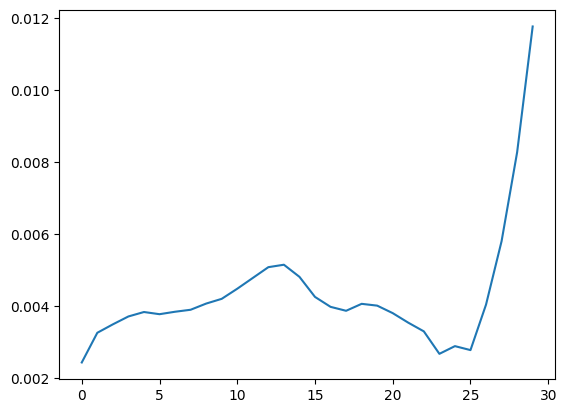

In [49]:
plt.plot(amplitudes[1:]-amplitudes[:-1])
# plt.yscale('log')

# Loaded from disk

In [77]:
import pickle
row = pickle.load(open("../scripts/data/0220_intermediate_overlaps_20_30.pickle", "rb"))

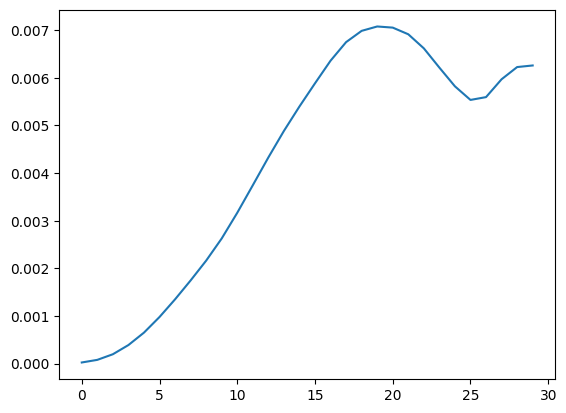

In [79]:
plt.plot(row['overlaps'])

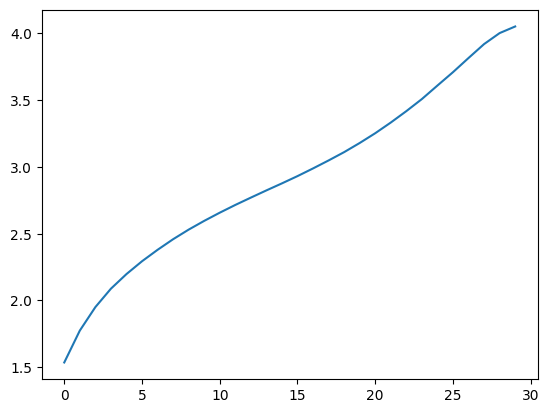

In [81]:
plt.plot(row['merit_factors'])